# MAGIC GAMMA TELESCOPE CODE

In [1]:
#imbort libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Style
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
#Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [2]:
#Metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_precision_recall_curve

In [3]:
#read the daset
df = pd.read_csv('telescope_data.csv')

In [4]:
features = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

In [5]:
df = pd.read_csv('telescope_data.csv',header=1,names=features)

In [6]:
df['class'] = df['class'].map({'g':0,'h':1})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19019 entries, 1 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19019 non-null  float64
 1   fWidth    19019 non-null  float64
 2   fSize     19019 non-null  float64
 3   fConc     19019 non-null  float64
 4   fConc1    19019 non-null  float64
 5   fAsym     19019 non-null  float64
 6   fM3Long   19019 non-null  float64
 7   fM3Trans  19019 non-null  float64
 8   fAlpha    19019 non-null  float64
 9   fDist     19019 non-null  float64
 10  class     19019 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.7 MB


In [8]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000
mean,53.251440,22.181291,2.825026,0.380326,0.214658,-4.333429,10.544942,0.250170,27.645052,193.823912,0.351648
std,42.365598,18.346484,0.472609,0.182818,0.110514,59.207163,51.001391,20.827896,26.104151,74.729344,0.477497
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863700,2.477100,0.235800,0.128450,-20.588300,-12.845050,-10.849750,5.546950,142.499000,0.000000
50%,37.149000,17.140600,2.739600,0.354100,0.196500,4.011900,15.309400,0.689800,17.677000,191.856900,0.000000
75%,70.126850,24.739950,3.101600,0.503700,0.285250,24.060350,35.844100,10.947050,45.884100,240.564550,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [9]:
df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,0
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,0
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.087,0
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.134,0
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.226,0
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.251,0
10,62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.7710,9.9144,323.094,0


<AxesSubplot:xlabel='fAlpha', ylabel='Count'>

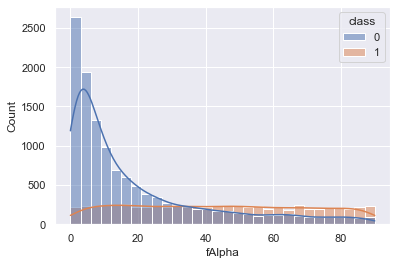

In [12]:
#hist plot for two features
sns.histplot(x='fAlpha', data=df, kde=True, hue='class')

<AxesSubplot:xlabel='fSize', ylabel='Count'>

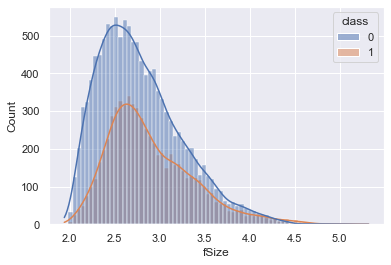

In [13]:
sns.histplot(x='fSize', data=df, kde=True, hue='class')

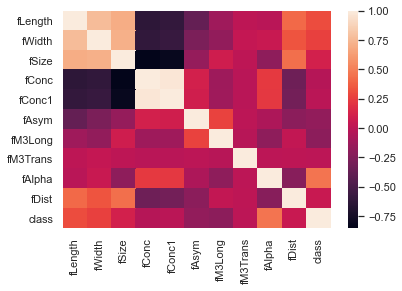

In [14]:
#heatmap
sns.heatmap(df.corr())

plt.savefig("Plotting_Correlation_HeatMap.jpg")

In [15]:
#correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
fLength,1.000000,0.770511,0.702451,-0.631003,-0.598155,-0.368546,-0.119742,0.013377,-0.008763,0.418449,0.307557
fWidth,0.770511,1.000000,0.717515,-0.609779,-0.581145,-0.266954,-0.176231,0.039737,0.066070,0.336810,0.265588
fSize,0.702451,0.717515,1.000000,-0.850852,-0.808842,-0.159854,0.095162,0.015447,-0.186667,0.437038,0.117782
fConc,-0.631003,-0.609779,-0.850852,1.000000,0.976413,0.112271,-0.121900,-0.011293,0.235272,-0.328347,-0.024612
fConc1,-0.598155,-0.581145,-0.808842,0.976413,1.000000,0.100164,-0.118767,-0.010969,0.229804,-0.304655,-0.004803
fAsym,-0.368546,-0.266954,-0.159854,0.112271,0.100164,1.000000,0.274041,0.002564,-0.055703,-0.206701,-0.173570
fM3Long,-0.119742,-0.176231,0.095162,-0.121900,-0.118767,0.274041,1.000000,-0.017192,-0.186282,0.037045,-0.193403
fM3Trans,0.013377,0.039737,0.015447,-0.011293,-0.010969,0.002564,-0.017192,1.000000,0.004669,0.011395,0.003822
fAlpha,-0.008763,0.066070,-0.186667,0.235272,0.229804,-0.055703,-0.186282,0.004669,1.000000,-0.220532,0.461007
fDist,0.418449,0.336810,0.437038,-0.328347,-0.304655,-0.206701,0.037045,0.011395,-0.220532,1.000000,0.065149


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


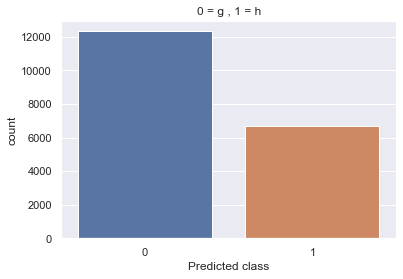

In [16]:
#Bar plot of classes
sns.countplot('class', data=df)
plt.title('0 = g , 1 = h')
plt.xlabel('Predicted class')
plt.show()

array([[<AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>,
        <AxesSubplot:title={'center':'fSize'}>],
       [<AxesSubplot:title={'center':'fConc'}>,
        <AxesSubplot:title={'center':'fConc1'}>,
        <AxesSubplot:title={'center':'fAsym'}>],
       [<AxesSubplot:title={'center':'fM3Long'}>,
        <AxesSubplot:title={'center':'fM3Trans'}>,
        <AxesSubplot:title={'center':'fAlpha'}>],
       [<AxesSubplot:title={'center':'fDist'}>,
        <AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

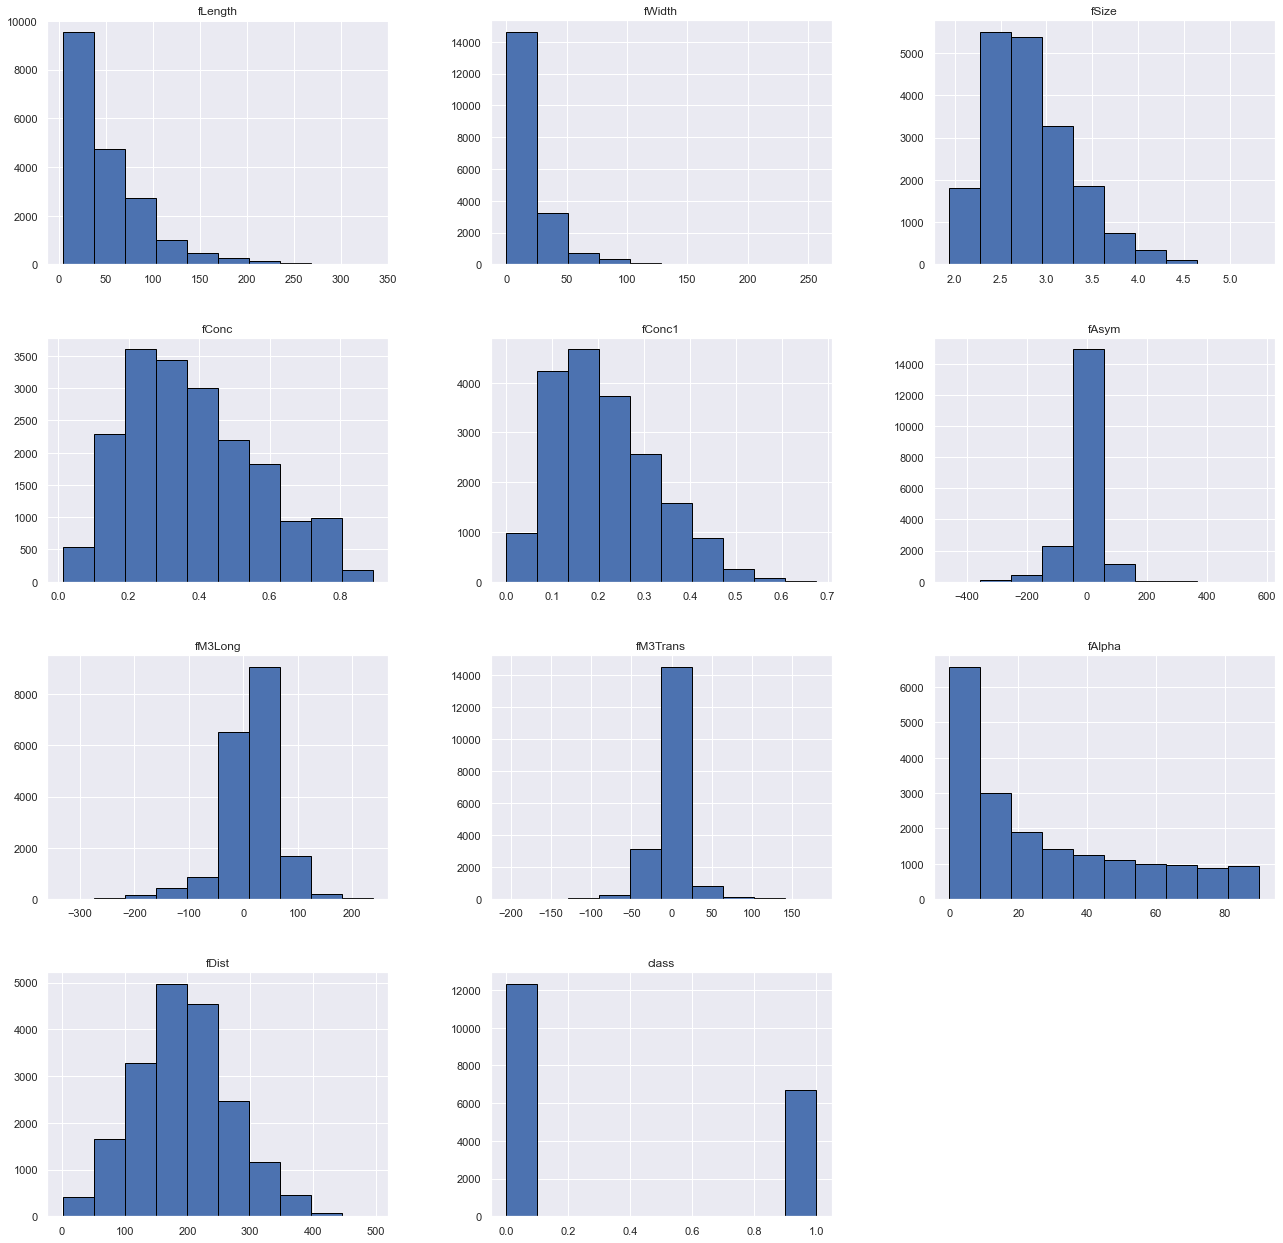

In [19]:
#Distribution of features
df.hist(figsize=(22,22),edgecolor='black')

In [ ]:
#sns.set_style("whitegrid");
#sns.pairplot(df, hue="class", size=8);
#plt.show()
#plt.savefig("Distribution of features.jpg")

In [20]:
#Divide data to X,y
X = df[features[:-1]]
y = df['class']

In [21]:
#Splitting Validation_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)
#Validation_set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True,random_state=42 ) # 0.2 x 0.75 = 0.15

In [22]:
# Predefined vallidation set to use it to GridSearchCV
#ps=5
from sklearn.model_selection import PredefinedSplit
ps = PredefinedSplit(test_fold=y_val)

In [23]:
#Scalinng the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

In [24]:
# classifiers
RFC= RandomForestClassifier()
svc= SVC()
DTE= DecisionTreeClassifier()
LogReg= LogisticRegression()
qda=QDA()
lda= LDA()

# Hyperparameters optimization

In [25]:
#RandomForest

In [26]:
grid_param = {
    'n_estimators': [ 5,10,50],
     'max_features':np.arange(2, 9),
    'criterion': ['gini', 'entropy'],
    'class_weight':['balanced', 'balanced_subsample','None']
}

In [27]:
gd_sr = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=grid_param,
                     scoring='average_precision',
                     cv=ps
                     )

In [28]:
gd_sr.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 581, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_select

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 581, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_select

GridSearchCV(cv=PredefinedSplit(test_fold=array([1, 0, ..., 0, 0])),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          'None'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': array([2, 3, 4, 5, 6, 7, 8]),
                         'n_estimators': [5, 10, 50]},
             scoring='average_precision')

In [29]:
best_parameters = gd_sr.best_params_
print('Best Parameters for RFC', best_parameters)
best_result = gd_sr.best_score_
print('Best result for RFC', best_result)

Best Parameters for RFC {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 2, 'n_estimators': 50}
Best result for RFC 0.8873516741312348


In [30]:
#DesicionTree 

In [31]:
param_grid = { 'criterion':['gini','entropy'],'class_weight':['balanced','None'],'max_depth': np.arange(3, 15), 'max_features': np.arange(2, 10) }
dtree_model=DecisionTreeClassifier()
dtree_gscv = GridSearchCV(dtree_model, param_grid,scoring='average_precision', cv=ps)
dtree_gscv.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_weight
    raise ValueError('The only valid preset for class_weight is '
ValueError: 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_weight
    raise ValueError('The only valid preset for class_weight is '
ValueError: 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_weight
    raise ValueError('The only valid preset for class_weight is '
ValueError: 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_weight
    raise ValueError('The only valid preset for class_weight is '
ValueError: 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_weight
    raise ValueError('The only valid preset for class_weight is '
ValueError: 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_weight
    raise ValueError('The only valid preset for class_weight is '
ValueError: 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_weight
    raise ValueError('The only valid preset for class_weight is '
ValueError: 

GridSearchCV(cv=PredefinedSplit(test_fold=array([1, 0, ..., 0, 0])),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', 'None'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='average_precision')

In [32]:
best_parameters = dtree_gscv.best_params_
print('Best Parameters for DTE',best_parameters)
best_result = dtree_gscv.best_score_
print('Best result for DTE', best_result)

Best Parameters for DTE {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 9}
Best result for DTE 0.8013048954828543


In [33]:
#LogisticRegression

In [34]:
grid={"C":np.logspace(-3,3,20), "penalty":["l2","l1",'elasticnet', 'none'],'class_weight':['balanced','None'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 
logreg=LogisticRegression()
grid_logreg=GridSearchCV(logreg,grid,scoring='average_precision',cv=ps)
grid_logreg.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  Fil

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  Fil

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore th

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore th

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore th

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore th

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimat

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-pa

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-pa

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\s

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimat

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore th

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\ad

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore th

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\ad

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\s

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\ad

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-pa

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\ad

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Det

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\ad

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

GridSearchCV(cv=PredefinedSplit(test_fold=array([1, 0, ..., 0, 0])),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'class_weight': ['balanced', 'None'],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='average_precision')

In [35]:
best_parameters = grid_logreg.best_params_
print('Best Parameters for LogReg',best_parameters)
best_result = grid_logreg.best_score_
print('Best result for LogReg', best_result)

Best Parameters for LogReg {'C': 0.1623776739188721, 'class_weight': 'None', 'penalty': 'l1', 'solver': 'saga'}
Best result for LogReg 0.7808575745122709


In [ ]:
#SVC

In [36]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf'],'class_weight':['balanced', 'None']} 
svc=SVC()  
grid1 = GridSearchCV(svc, param_grid,scoring='average_precision', refit = True, verbose =0,cv=ps)
# fitting the model for grid search
grid1.fit(X_train, y_train)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 546, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 63, in compute_class_weight
    raise ValueError("class_weight must be 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 546, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 63, in compute_class_weight
    raise ValueError("class_weight must be 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 546, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 63, in compute_class_weight
    raise ValueError("class_weight must be 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 546, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 63, in compute_class_weight
    raise ValueError("class_weight must be 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 546, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 63, in compute_class_weight
    raise ValueError("class_weight must be 

GridSearchCV(cv=PredefinedSplit(test_fold=array([1, 0, ..., 0, 0])),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'None'],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='average_precision')

In [37]:
best_parameters = grid1.best_params_
print('Best Parameters for SVC',best_parameters)
best_result = grid1.best_score_
print('Best result for SVC' ,best_result)


Best Parameters for SVC {'C': 100, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Best result for SVC 0.8798264598735359


In [38]:
#LDA

In [39]:
param_grid_LDA = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': ['auto', 'float', 'None'],'tol':[0.0001,0.001,0.01,0.1]}

In [40]:
lda=LDA()
grid_lda=GridSearchCV(lda,param_grid_LDA,scoring='average_precision',cv=ps)
grid_lda.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 468, in fit
    self._solve_eigen(X, y, shrinkage=self.shrinkage)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 329, in _solve_eigen
    self.covariance_ = _class_cov(X, y, self.priors_, shrinkage)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 127, in _class_cov
    cov += priors[idx] * np.atleast_2d(_cov(Xg, shrinkage))
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\discriminant_an

GridSearchCV(cv=PredefinedSplit(test_fold=array([1, 0, ..., 0, 0])),
             estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='average_precision')

In [41]:
best_parameters = grid_lda.best_params_
print('Best Parameters for LDA' ,best_parameters)
best_result = grid_lda.best_score_
print('Best result for LDA' ,best_result)

Best Parameters for LDA {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}
Best result for LDA 0.7679545089869482


In [42]:
#QDA

In [43]:
param_grid_QDA={'tol':[0.0001,0.001,0.01,0.1]}

In [44]:
qda=QDA()
grid_qda=GridSearchCV(lda, param_grid_QDA,scoring='average_precision',cv=ps)
grid_qda.fit(X_train,y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([1, 0, ..., 0, 0])),
             estimator=LinearDiscriminantAnalysis(),
             param_grid={'tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='average_precision')

In [45]:
best_parameters = grid_qda.best_params_
print('Best Parameters for QDA',best_parameters)
best_result = grid_qda.best_score_
print('Best result for QDA' ,best_result)

Best Parameters for QDA {'tol': 0.0001}
Best result for QDA 0.7670608978969823


# Selcet the Best Classifiers

In [46]:
BestClassifiers= {
RandomForestClassifier( class_weight ='balanced_subsample', criterion='entropy', max_features=4, n_estimators= 50),
DecisionTreeClassifier(class_weight= 'balanced', criterion='entropy', max_depth= 5, max_features=8),
SVC(C=100, kernel='rbf',class_weight='balanced',gamma=0.01 ),
LogisticRegression(C= 0.16, class_weight ='none', penalty='l1', solver ='saga'),
LDA(shrinkage= 'auto', solver= 'lsqr', tol= 0.0001),
QDA(tol= 0.0001) }

In [47]:
def displayscores(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    cm_display = ConfusionMatrixDisplay(cm).plot()
    print("F1-score: {:.2f}%".format(f1_score(y_test, y_pred)*100))
    print("accuracy  : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
    print ("precision  : {:.2f}%".format(precision_score(y_test, y_pred) * 100))
    print ("av_prec : {:.2f}%".format(average_precision_score(y_test, y_pred, average='micro') * 100))

# Comparing classifiers after hyperparameter tuning

RandomForest
F1-score: 80.62%
accuracy  : 87.38%
precision  : 85.50%
av_prec : 73.38%

Desicion Trees
F1-score: 72.95%
accuracy  : 81.49%
precision  : 73.40%
av_prec : 62.68%

SupportVectorMachines
F1-score: 81.26%
accuracy  : 87.31%
precision  : 82.63%
av_prec : 72.96%

Logistic Regression
F1-score: 67.80%
accuracy  : 80.16%
precision  : 76.80%
av_prec : 60.14%

LDA
F1-score: 65.46%
accuracy  : 79.28%
precision  : 76.82%
av_prec : 58.60%

QDA
F1-score: 61.53%
accuracy  : 78.48%
precision  : 79.97%
av_prec : 57.19%


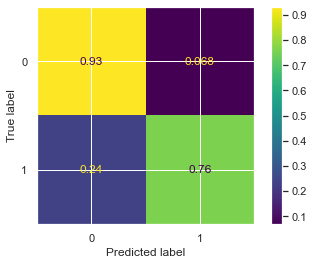

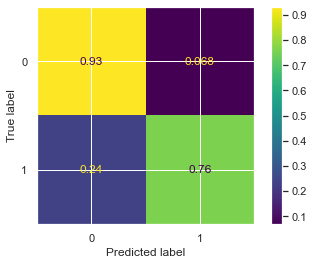

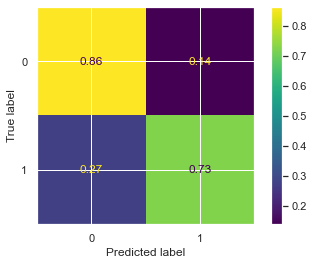

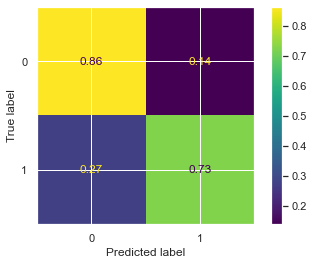

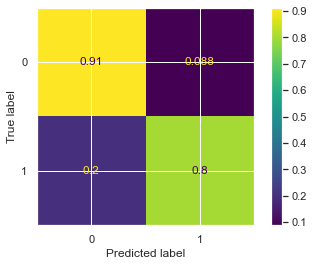

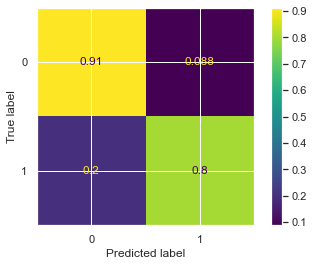

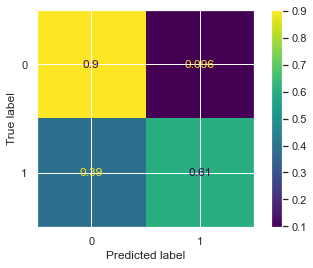

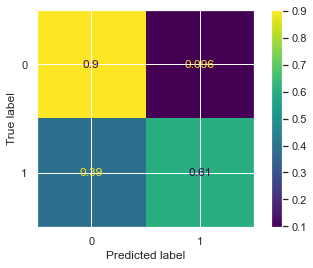

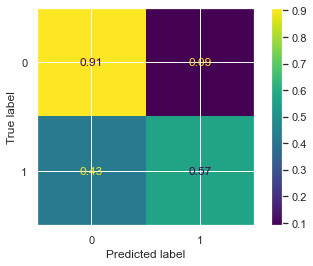

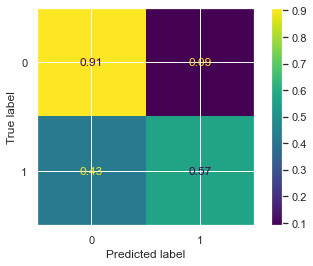

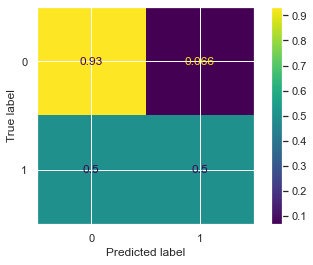

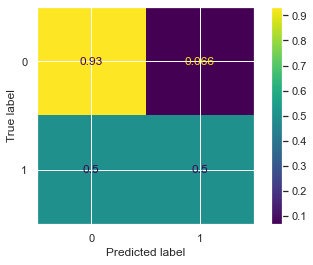

In [51]:
# Perfomance in train set
RF=RandomForestClassifier( class_weight ='balanced_subsample', criterion='entropy', max_features=4, n_estimators= 50)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_val)
print("RandomForest")
cm = confusion_matrix(y_val, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_val,y_pred)
print("")

DT=DecisionTreeClassifier(class_weight= 'balanced', criterion='entropy', max_depth= 5, max_features=8)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
print("Desicion Trees")
cm = confusion_matrix(y_val, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_val,y_pred)
print("")

svc=SVC(C=100, kernel='rbf',class_weight='balanced',gamma=0.01 )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
print("SupportVectorMachines")
cm = confusion_matrix(y_val, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_val,y_pred)
print("")

logreg=LogisticRegression(C= 0.16, class_weight ='none', penalty='l1', solver ='saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
print("Logistic Regression")
cm = confusion_matrix(y_val, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_val,y_pred)
print("")

lda=LDA(shrinkage= 'auto', solver= 'lsqr', tol= 0.0001)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_val)
print("LDA")
cm = confusion_matrix(y_val, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_val,y_pred)
print("")

qda=QDA(tol= 0.0001) 
qda.fit(X_train, y_train)
y_pred = qda.predict(X_val)
print("QDA")
cm = confusion_matrix(y_val, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_val,y_pred)

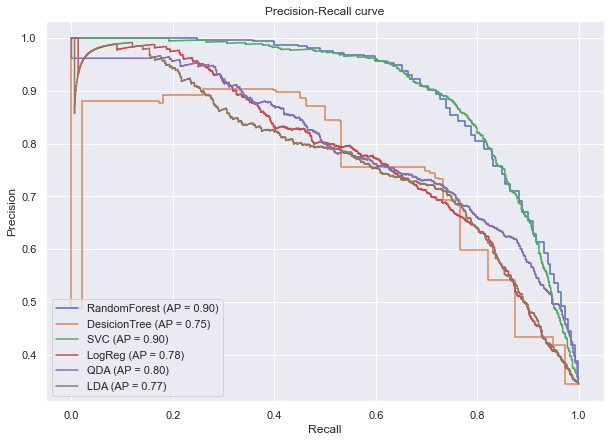

In [52]:
# Precision Recall Curves
fig100 = plt.figure(figsize=(10,7))
plot_precision_recall_curve(RF, X_val, y_val, ax = plt.gca(),name = "RandomForest")

plot_precision_recall_curve(DT, X_val, y_val, ax = plt.gca(),name = "DesicionTree")

plot_precision_recall_curve(svc, X_val, y_val, ax = plt.gca(),name = "SVC")

plot_precision_recall_curve(logreg, X_val, y_val, ax = plt.gca(),name = "LogReg")

plot_precision_recall_curve(qda, X_val, y_val, ax = plt.gca(),name = "QDA")

plot_precision_recall_curve(lda, X_val, y_val, ax = plt.gca(),name = "LDA")

plt.title('Precision-Recall curve')
plt.savefig("Precision-Recall curve.jpg")

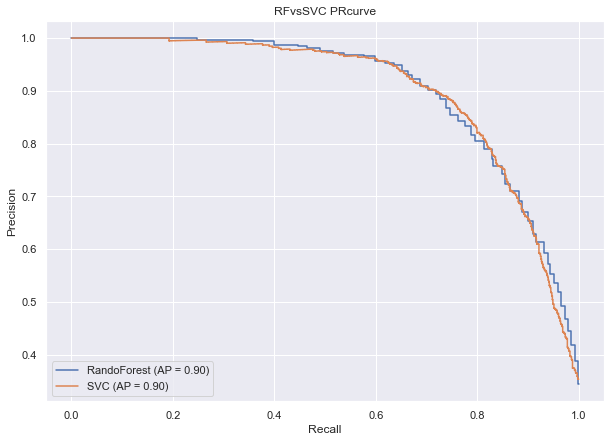

In [53]:
#Random Forest vs SVC (validation set)
fig100 = plt.figure(figsize=(10,7))
plot_precision_recall_curve(RF, X_val, y_val, ax = plt.gca(),name = "RandoForest")

plot_precision_recall_curve(svc, X_val, y_val, ax = plt.gca(),name = "SVC")


plt.title('RFvsSVC PRcurve')
plt.savefig("RFvsSVC PRcurve.jpg")

RandomForest
F1-score: 81.47%
accuracy  : 88.01%
precision  : 87.04%
av_prec : 74.71%



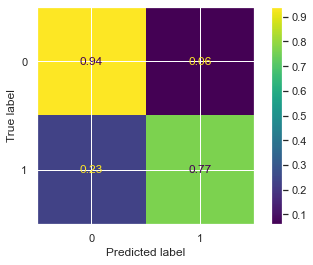

In [54]:
# Confusion Matric and Scores for Random Forest
RF=RandomForestClassifier( class_weight ='balanced', criterion='entropy', max_features=3, n_estimators= 50)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_val)
print("RandomForest")
displayscores(y_val,y_pred)
plt.savefig("RF cm.jpg")
print("")

SupportVectorMachines
F1-score: 80.28%
accuracy  : 86.27%
precision  : 81.69%
av_prec : 71.94%



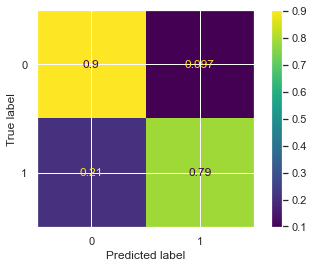

In [55]:
# Confusion Matric and Scores for SVC
svc=SVC(C=100, kernel='rbf',class_weight='balanced',gamma=0.01 )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_train)
print("SupportVectorMachines")
displayscores(y_train,y_pred)
plt.savefig("SVC cm.jpg")
print("")

# The Final model

In [56]:
RF = RandomForestClassifier(class_weight= 'balanced', criterion= 'entropy', max_features=3 , n_estimators= 50 )
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

F1-score: 80.07%
Accuracy: 87.21%
precision: 88.10%
av_prec: 73.96%


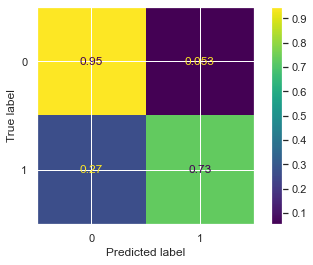

In [57]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
print("F1-score: {:.2f}%".format(f1_score(y_test, y_pred)*100))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print ("precision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print ("av_prec: {:.2f}%".format(average_precision_score(y_test, y_pred,average='micro' ) * 100))

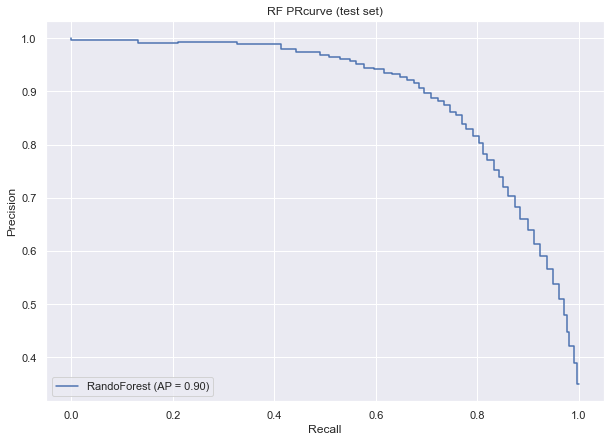

In [58]:
fig100 = plt.figure(figsize=(10,7))
plot_precision_recall_curve(RF, X_test, y_test, ax = plt.gca(),name = "RandoForest")

plt.title('RF PRcurve (test set)')
plt.savefig("RF PRcurve.jpg")

# Feature Selection

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

In [60]:
#Compare feat_importances with two models

Model feature importances
[0.11901654 0.10129883 0.10750116 0.06870932 0.06179233 0.05862508
 0.0838445  0.05668639 0.27414624 0.06837962]


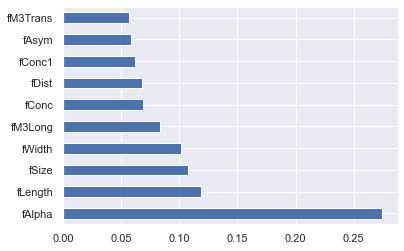

In [61]:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(class_weight='balanced')
model.fit(X,y)
print('Model feature importances')
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.savefig("feat_importances.jpg")
plt.show()


Model feature importances
[0.13818226 0.11876681 0.11689061 0.06383056 0.05943799 0.05448723
 0.09092567 0.04509125 0.24134124 0.07104638]


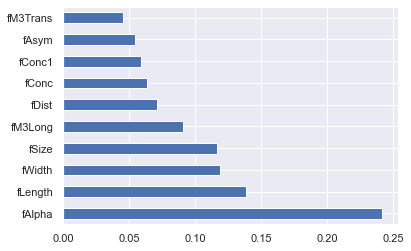

In [62]:
model1 = RandomForestClassifier(bootstrap= True, class_weight= 'balanced', criterion= 'entropy', max_features= 4, n_estimators= 10 )
model1.fit(X,y)
print('Model feature importances')
print(model1.feature_importances_) 
feat_importances = pd.Series(model1.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [63]:
X_selected = df[['fAlpha', 'fLength', 'fSize', 'fDist', 'fM3Long']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size= 0.25, shuffle=True,random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Comparing classifiers after feature selection

RandomForest
F1-score: 75.36%
accuracy  : 84.27%
precision  : 83.38%
av_prec : 68.26%

Desicion Trees
F1-score: 73.10%
accuracy  : 80.99%
precision  : 72.41%
av_prec : 62.60%

SupportVectorMachines
F1-score: 74.29%
accuracy  : 82.78%
precision  : 77.78%
av_prec : 65.41%

Logistic Regression
F1-score: 66.62%
accuracy  : 79.22%
precision  : 76.08%
av_prec : 59.34%

LDA
F1-score: 64.39%
accuracy  : 78.49%
precision  : 76.51%
av_prec : 58.07%

QDA
F1-score: 62.69%
accuracy  : 78.68%
precision  : 80.83%
av_prec : 58.47%


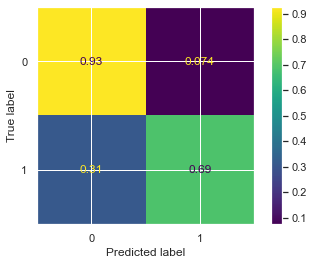

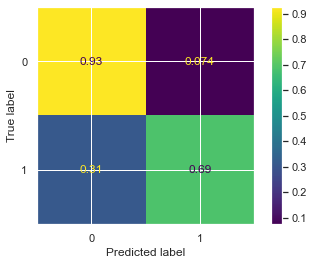

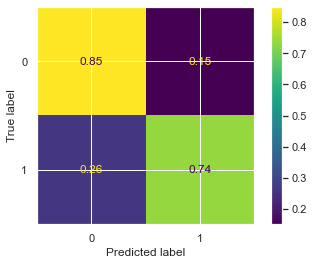

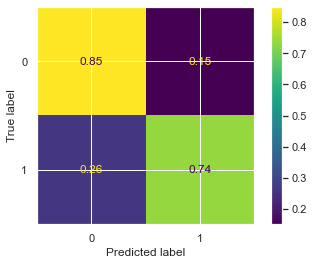

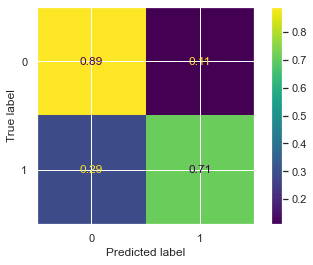

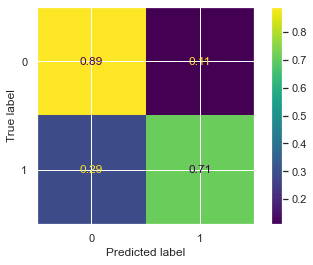

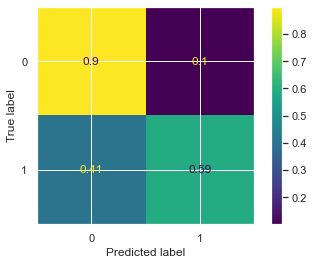

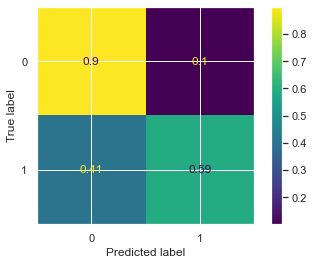

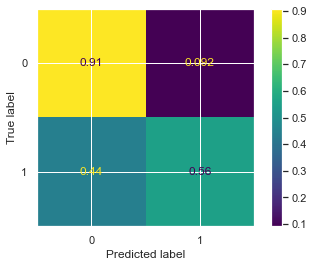

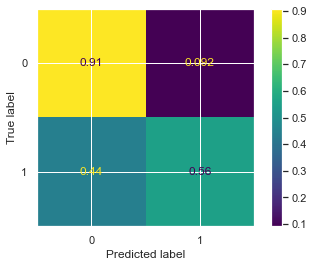

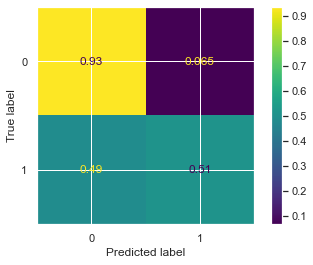

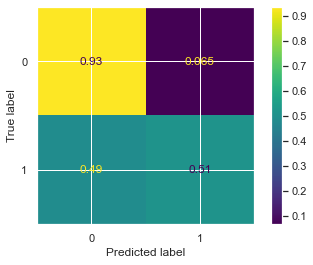

In [65]:
RF=RandomForestClassifier( class_weight ='balanced', criterion='entropy', n_estimators= 50)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print("RandomForest")
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_test,y_pred)
print("")

DT=DecisionTreeClassifier(class_weight= 'balanced', criterion='gini', max_depth= 5)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("Desicion Trees")
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_test,y_pred)
print("")

svc=SVC(C=100, kernel='rbf',class_weight='balanced',gamma=0.01 )
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("SupportVectorMachines")
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_test,y_pred)
print("")

logreg=LogisticRegression(C= 0.16, class_weight ='none', penalty='l1', solver ='saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression")
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_test,y_pred)
print("")

lda=LDA(shrinkage= 'auto', solver= 'lsqr', tol= 0.0001)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print("LDA")
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_test,y_pred)
print("")

qda=QDA(tol= 0.0001) 
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
print("QDA")
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()
displayscores(y_test,y_pred)

In [66]:
#Precision Recall Curves after feature selection

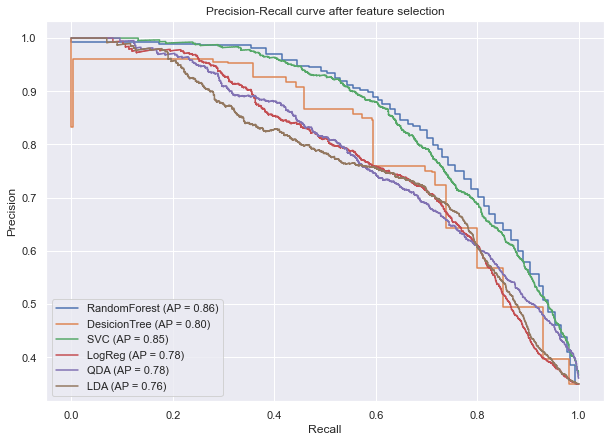

In [67]:
fig100 = plt.figure(figsize=(10,7))
plot_precision_recall_curve(RF, X_test, y_test, ax = plt.gca(),name = "RandomForest")

plot_precision_recall_curve(DT, X_test, y_test, ax = plt.gca(),name = "DesicionTree")

plot_precision_recall_curve(svc, X_test, y_test, ax = plt.gca(),name = "SVC")

plot_precision_recall_curve(logreg, X_test, y_test, ax = plt.gca(),name = "LogReg")

plot_precision_recall_curve(qda, X_test, y_test, ax = plt.gca(),name = "QDA")

plot_precision_recall_curve(lda, X_test, y_test, ax = plt.gca(),name = "LDA")

plt.title('Precision-Recall curve after feature selection')
plt.savefig("Feature selection.jpg")